In [1]:
import numpy as np
import os

from astropy.table import Table, vstack
from astropy.io.fits import getdata
import matplotlib.pyplot as plt

In [2]:
path0 = '/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/'
infile = path0+ 'dnf_gold_2_2_{:06d}.fits'

In [3]:
table_list = []
for i in range(9):
    infilei = infile.format(i+1)
    print(infilei)
    data = Table(getdata(infilei))
    table_list.append(data)

/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/dnf_gold_2_2_000001.fits
/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/dnf_gold_2_2_000002.fits
/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/dnf_gold_2_2_000003.fits
/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/dnf_gold_2_2_000004.fits
/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/dnf_gold_2_2_000005.fits
/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/dnf_gold_2_2_000006.fits
/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/dnf_gold_2_2_000007.fits
/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/dnf_gold_2_2_000008.fits
/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/dnf_gold_2_2_000009.fits


In [4]:
data = vstack(table_list)
table_list = 0

In [5]:
data.colnames

['COADD_OBJECT_ID',
 'RA',
 'DEC',
 'DNF_ZMC_SOF',
 'DNF_ZMEAN_SOF',
 'DNF_ZSIGMA_SOF']

In [6]:
len(data)*1e-9

0.180582079

In [7]:
data

COADD_OBJECT_ID,RA,DEC,DNF_ZMC_SOF,DNF_ZMEAN_SOF,DNF_ZSIGMA_SOF
int64,float64,float64,float64,float64,float64
101129851,34.596882,-4.503443,0.7920100092887878,0.9763073325157166,0.16953787207603455
66833539,30.946015,-1.14108,0.5400000214576721,0.5064876675605774,0.24916523694992065
102166099,34.442172,-14.877021,0.872829020023346,0.8975903987884521,0.1404227763414383
102167372,34.465097,-14.896209,0.9096819758415222,0.8423948884010315,0.0794684961438179
101123285,34.245532,-4.356136,0.6815310120582581,0.789398193359375,0.06013130024075508
76954621,31.543579,-2.916136,1.1389100551605225,0.6012179255485535,0.24335616827011108
86803797,32.723877,-26.1371,0.16120000183582306,0.19576047360897064,0.1020866334438324
101135114,34.413374,-4.613225,1.2144999504089355,0.8000852465629578,0.5687243342399597
64339834,30.065321,-20.479466,0.2959499955177307,0.3088899850845337,0.011596125550568104


In [8]:
ra1, dec1 = np.array(data['RA']), np.array(data['DEC'])

#data = 0

In [9]:
import h5py

/cvmfs/des.opensciencegrid.org/fnal/anaconda2/envs/des18a/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [10]:
path   = '/data/des81.b/data/mariaeli/y3_cats/subsampled/'
fname  =     path+'Y3_GOLD_2_2.1_subsampled.h5'
master = h5py.File(fname,'r')

In [11]:
mag_i      = master['catalog/gold/sof_cm_mag_corrected_i'][:][:]
maglim_idx = np.where((mag_i<=23.)&(mag_i>=0.))[0]

# hpx16384   = master['catalog/gold/hpix_16384'][:][maglim_idx]
# zndf        = master['catalog/gold/dnf_zmean_sof'][:][maglim_idx]
cid        = master['catalog/gold/coadd_object_id'][:][maglim_idx]
ra         = master['catalog/gold/ra'][:][maglim_idx]
dec        = master['catalog/gold/dec'][:][maglim_idx]

mag_i = 0.
master.close()

In [12]:
fname_aux  = path+'Y3_GOLD_2_2.1_DNF_subsampled.h5'
indexes= h5py.File(fname_aux,'r')
dnf    = indexes['catalog/unsheared']

d_cid  = dnf['coadd_object_id'][:][maglim_idx]
# d_z    = dnf['z'][:][maglim_idx]
d_zmean= dnf['zmean_sof'][:][maglim_idx]
# d_sigma= dnf['z_sigma'][:][maglim_idx]

d_z = np.zeros_like(d_zmean)
d_sigma = 0.03*(1+d_zmean)

indexes.close()

# Matching

### Checking DNF Sample

In [15]:
import smatch

In [16]:
path = '/data/des61.a/data/johnny/emulatorPhotoZ/training_sample/'
infile = path+'spec_y3_gold_2_2_27JUN19_photoz.fits'

tab = Table(getdata(infile))

In [17]:
nside=int(2*4096) # healpix nside
maxmatch=1 # return closest match

# ra,dec,radius in degrees
m = smatch.match(tab['RA'], tab['DEC'], 1./3600, ra1, dec1,
                       nside=nside, maxmatch=maxmatch)

In [20]:
z = tab['Z'][m['i1'][:]]
zdnf1 = tab['DNF_ZMEAN_MOF'][m['i1'][:]]
zdnf2 = data['DNF_ZMEAN_SOF'][m['i2'][:]]

In [23]:
zt  = -99.*np.ones_like(data['DNF_ZMEAN_SOF'])
zt[m['i2'][:]] = tab['Z'][m['i1'][:]]

### Sample Match

In [24]:
nside=int(2*4096) # healpix nside
maxmatch=1 # return closest match

# ra,dec,radius in degrees
matches = smatch.match(ra, dec, 1./3600, ra1, dec1,
                       nside=nside, maxmatch=maxmatch)

In [25]:
# access via the indices
matchs = [matches['i2'][:],matches['i1'][:]]

In [26]:
Nmatch = matchs[1].size
Ndata  = len(dec)

print('%E, %E'%(Nmatch,Ndata))
print('ratio %.4f'%(1.*Nmatch/Ndata))

1.971304E+07, 2.187410E+07
ratio 0.9012


In [27]:
Nmatch = matchs[0].size
Ndata  = len(ra1)

print('%E, %E'%(Nmatch,Ndata))
print('ratio %.4f'%(1.*Nmatch/Ndata))

1.971304E+07, 1.805821E+08
ratio 0.1092


In [28]:
dnf1 = data['DNF_ZMEAN_SOF'][matchs[0]]
dnf2 = d_zmean[matchs[1]]

(0, 1)

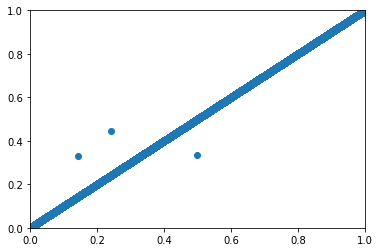

In [29]:
plt.scatter(dnf1[::20],dnf2[::20])
plt.xlim(0,1)
plt.ylim(0,1)

In [30]:
#matchs = match

## Save File
z    = d_zmean
zmc  = -99.*np.ones_like(ra)
zerr = -99.*np.ones_like(ra)
ztrue= -99.*np.ones_like(ra)

z[matchs[1]] = data['DNF_ZMEAN_SOF'][matchs[0]]
zerr[matchs[1]] = data['DNF_ZSIGMA_SOF'][matchs[0]]
zmc[matchs[1]] = data['DNF_ZMC_SOF'][matchs[0]]
ztrue[matchs[1]] = zt[matchs[0]]

cols = ['indices','coadd_object_id','ra','dec','Z','DNF_ZMEAN_SOF','DNF_ZSIGMA_SOF','DNF_ZMC_SOF']
data_list = [maglim_idx,cid,ra,dec,ztrue,z,zerr,zmc]


In [31]:
outfile = path0+'y3_gold_2_2.1_dnf_subsampled_jesteves.h5'

master = h5py.File(outfile,'w')
master.create_group('catalog')

for col,di in zip(cols,data_list):
    master.create_dataset('catalog/%s'%col, data=di)

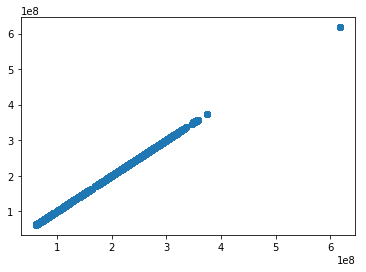

In [32]:
plt.scatter(cid[::20],d_cid[::20])


(0, 1)

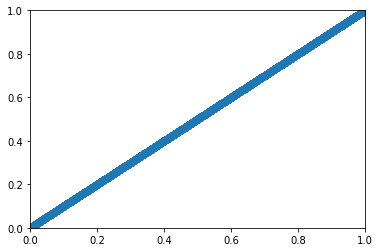

In [33]:
plt.scatter(z[::20],d_zmean[::20])
plt.xlim(0,1)
plt.ylim(0,1)

In [34]:
outfile

'/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/y3_gold_2_2.1_dnf_subsampled_jesteves.h5'

In [35]:
master['catalog'].keys()

[u'DNF_ZMC_SOF',
 u'DNF_ZMEAN_SOF',
 u'DNF_ZSIGMA_SOF',
 u'Z',
 u'coadd_object_id',
 u'dec',
 u'indices',
 u'ra']

In [36]:
master.close()

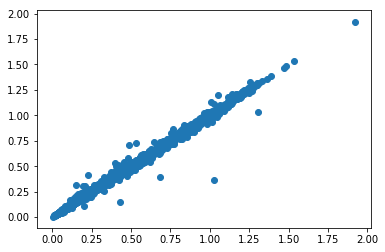

In [37]:
plt.scatter(zdnf1[::30],zdnf2[::30])

ValueError: x and y must be the same size

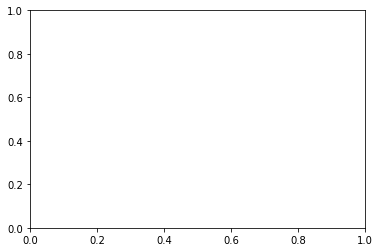

In [39]:
plt.scatter(z[::30],zdnf2[::30])

### Indice Matching

In [ ]:
import esutil

In [ ]:
d_cid, indices = np.unique(np.array(data['COADD_OBJECT_ID'][:]),return_index=True)
d_ra = np.array(data['RA'])[indices]
d_dec= np.array(data['DEC'])[indices]

In [ ]:
1e-8*d_cid.size

In [ ]:
match = esutil.numpy_util.match(d_cid,cid)

In [ ]:
np.count_nonzero(np.abs(d_ra[match[0]]-ra[match[1]])>1e-5)

In [ ]:
np.count_nonzero(np.abs(d_dec[match[0]]-dec[match[1]])>1e-5)

In [ ]:
Nmatch = match[0].size
Ndata  = len(d_cid)

print('%E, %E'%(Nmatch,Ndata))
print('ratio %.4f'%(1.*Nmatch/Ndata))

In [ ]:
Nmatch = match[1].size
Ndata  = len(cid)

print('%E, %E'%(Nmatch,Ndata))
print('ratio %.4f'%(1.*Nmatch/Ndata))

In [ ]:
import pandas as pd

In [ ]:
path = '/data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2/'

In [ ]:
ls /data/des61.a/data/johnny/DESY3/data/photoz/dnf_gold_2_2

In [ ]:
infile = path+'dnf_y3_gold_2_2_magLim_{:06d}.h5'
# infile = path+ 'dnf_gold_2_2_000001.fits'

In [ ]:
def show_h5_group(name,node):
    ''' show all the h5 groups
    Example:
    fmaster = h5py.File(copa.master_fname,'r')
    fmaster.visititems(show_h5_group)

    ## https://stackoverflow.com/questions/45562169/traverse-hdf5-file-tree-and-continue-after-return
    '''
    if isinstance(node, h5py.Group):
        print(name,node)
    return None

def show_h5_dataset(name,node):
    if isinstance(node, h5py.Dataset):
        print(name,node)
    return None

In [ ]:
h5 = h5py.File(infile.format(1))
cols = list(h5['data/_i_table'].keys())
# h5.close()

In [ ]:
h5.visititems(show_h5_group)

In [ ]:
h5.visititems(show_h5_dataset)

In [ ]:
cid = h5['data/_i_table/COADD_OBJECT_ID/'][:]

In [ ]:
h5.close()

In [ ]:
17550000/len(cols)

In [ ]:
data['COADD_OBJECT_ID'][:]

In [ ]:
cols

In [ ]:
mydict = dict().fromkeys(cols)

In [ ]:
df = pd.read_hdf(infile.format(i+1))

In [ ]:
for i in range(10):
    print('file %i'%i)
    h5 = h5py.File(infile.format(i+1))
    data = h5['data/_i_table']
    for col in cols:
        res = data[col][:]
        if i>0:
            res = np.append(mydict[str(col)][:],res)
        mydict[str(col)] = res
    h5.close()

In [ ]:
mydict